# Regressão linear 

#### Autor: Victor Flávio P. Dornelos

In [1]:
# Bibliotecas necessárias 
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [2]:
# Importando os dados
df = pd.read_csv('insurance.csv')

## Exploração dos dados

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


As estatísticas básicas demonstram que todas variáveis quantitativas tem uma grande dispersão de seus valores, exceto filhos. Então, observar com a relação dessas variáveis vão se interagir com os custos poderá trazer resultados muitos interessantes durante a análise.

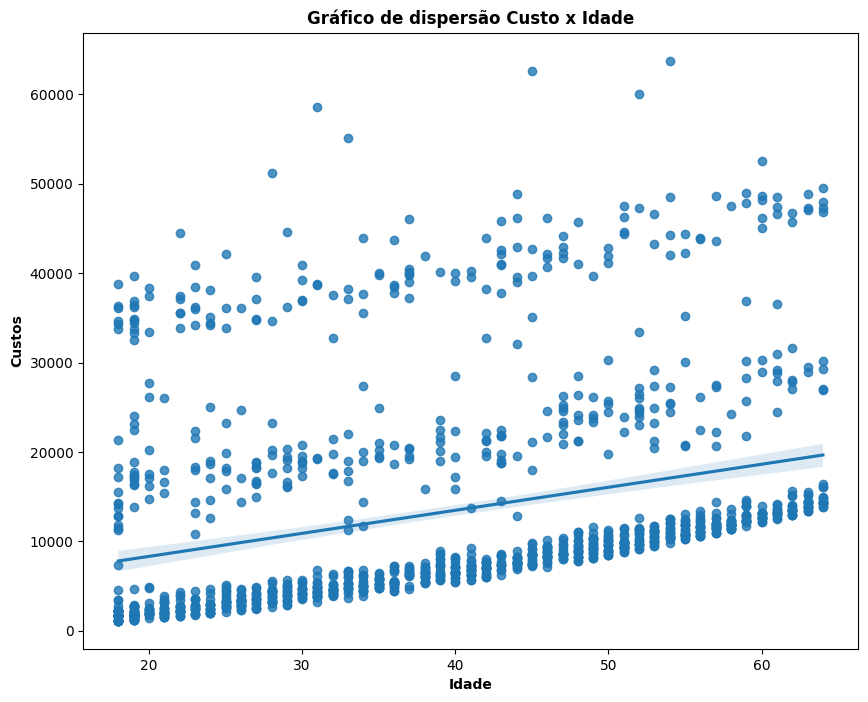

In [4]:
# Gráfico de dispersão
plt.figure(figsize=(10,8))

sns.regplot(data=df,x='age',y='charges')

plt.title('Gráfico de dispersão Custo x Idade',fontweight='bold')
plt.xlabel('Idade',fontweight='bold')
plt.ylabel('Custos',fontweight='bold')
plt.grid(False)

O gráfico de dispersão indica que existe claramente um aumento nos custos de encargos dos planos de saúde. Porém, é visto que existe uma separação em grupos nessa relação, que pode ser ocasionada por outras variáveis além da idade.

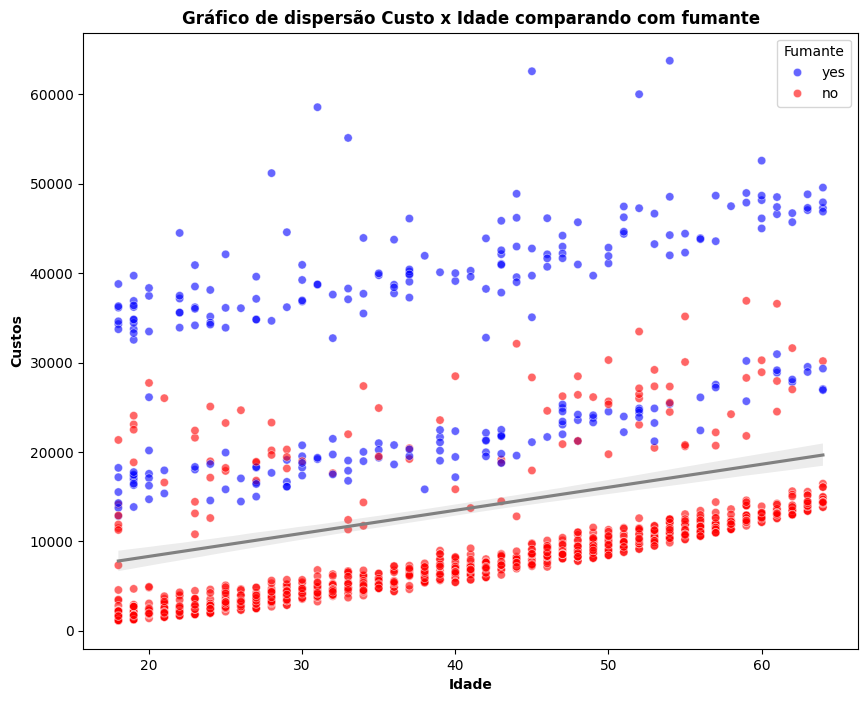

In [5]:
# Gráfico de dispersão
plt.figure(figsize=(10, 8))

sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette=['blue', 'red'], alpha=0.6)
sns.regplot(data=df, x='age', y='charges', scatter=False, color='gray')

plt.title('Gráfico de dispersão Custo x Idade comparando com fumante', fontweight='bold')
plt.xlabel('Idade', fontweight='bold')
plt.ylabel('Custos', fontweight='bold')
plt.grid(False)
plt.legend(title='Fumante')
plt.show()

É comprovado que o uso de cigarro gera danos a saúde, assim, era esperado que os fumantes tivessem maiores custos com saúde. Conforme, o gráfico indica que é muito evidente que o fumante tem gastos muito mais elevados.

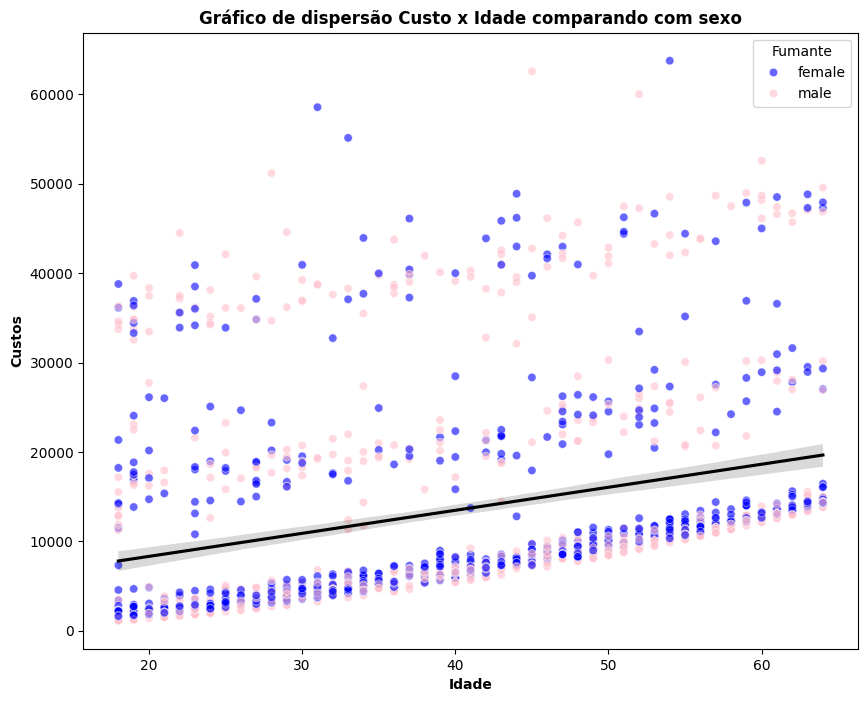

In [6]:
# Gráfico de dispersão
plt.figure(figsize=(10, 8))

sns.scatterplot(data=df, x='age', y='charges', hue='sex', palette=['blue', 'pink'], alpha=0.6)
sns.regplot(data=df, x='age', y='charges', scatter=False, color='black')

plt.title('Gráfico de dispersão Custo x Idade comparando com sexo', fontweight='bold')
plt.xlabel('Idade', fontweight='bold')
plt.ylabel('Custos', fontweight='bold')
plt.grid(False)
plt.legend(title='Fumante')
plt.show()

Como a expectativa de vida dos homens são menores que as mulheres e são mais propensos a maiores riscos, torna gênero uma variável importante para análise. Visualmente, é difícil observar uma diferença grande entre homens e mulheres.

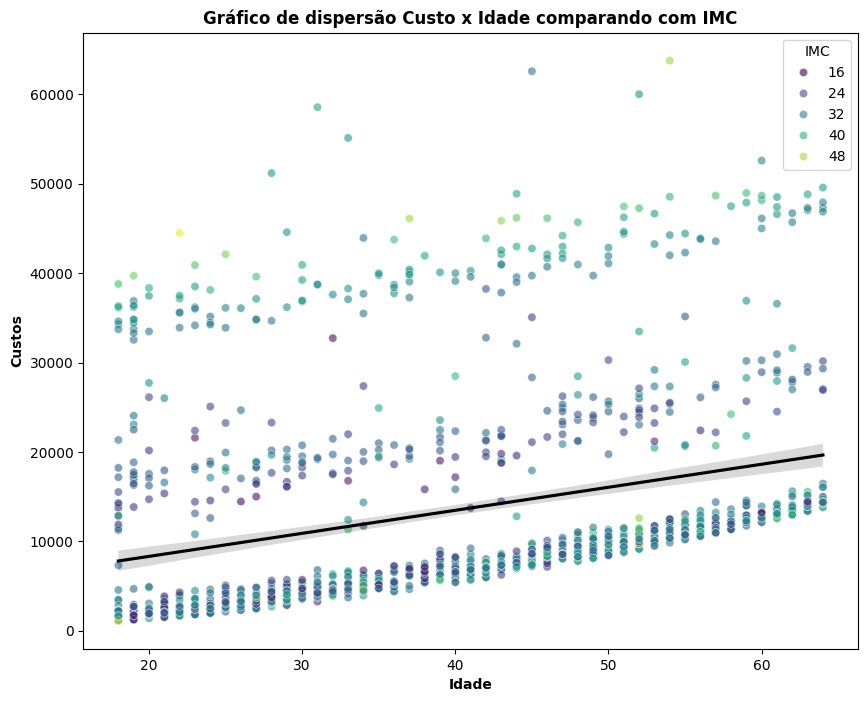

In [7]:
# Gráfico de dispersão
plt.figure(figsize=(10, 8))

sns.scatterplot(data=df, x='age', y='charges', hue='bmi', palette='viridis', alpha=0.6)
sns.regplot(data=df, x='age', y='charges', scatter=False, color='black')

plt.title('Gráfico de dispersão Custo x Idade comparando com IMC', fontweight='bold')
plt.xlabel('Idade', fontweight='bold')
plt.ylabel('Custos', fontweight='bold')
plt.grid(False)
plt.legend(title='IMC')
plt.show()

O IMC é um índice de massa corporal que é uma relação de peso / altura <sup>2</sup>. Pessoas com alto IMC se enquadram no caso de obesidade, necessitando de mais cuidados médicos devido sua condição de saúde. Visualmente, é possível observar essa relação no gráfico pessoas com IMC maior que 32 estão no grupo de maiores custos.

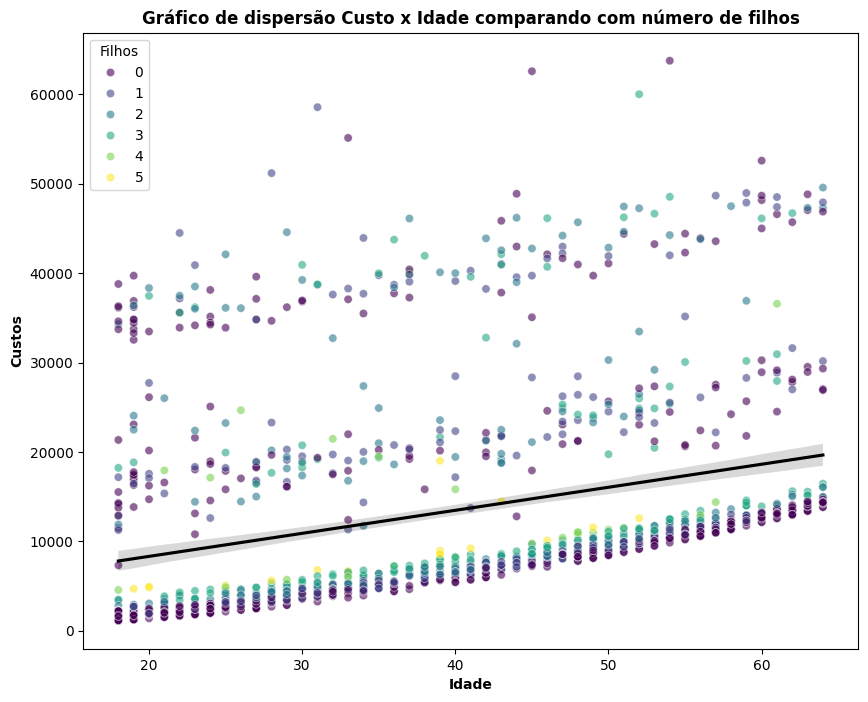

In [8]:
# Gráfico de dispersão
plt.figure(figsize=(10, 8))

sns.scatterplot(data=df, x='age', y='charges', hue='children', palette='viridis', alpha=0.6)
sns.regplot(data=df, x='age', y='charges', scatter=False, color='black')

plt.title('Gráfico de dispersão Custo x Idade comparando com número de filhos', fontweight='bold')
plt.xlabel('Idade', fontweight='bold')
plt.ylabel('Custos', fontweight='bold')
plt.grid(False)
plt.legend(title='Filhos')
plt.show()

Com a maior quantidade de filho, ou seja, mais dependentes era esperado maiores custos com o plano de saúde. O gráfico indica que no grupo mais baixo essa relação realmente acontece, porém no grupos mais acima essa relação perde força. 

Isso pode ter duas hipóteses, a primeira é que as outras variáveis tem maior peso ou que os outros fatores afetam na quantidade de filhos.

In [9]:
# Categorizando o IMC
conditions = [
    (df['bmi'] < 18.5),
    (df['bmi'] >= 18.5) & (df['bmi'] < 25),
    (df['bmi'] >= 25) & (df['bmi'] < 30),
    (df['bmi'] >= 30)
]
choices = ['Abaixo do peso', 'Peso normal', 'Sobrepeso', 'Obesidade']
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, float('inf')], labels=choices, right=False)

# Calculando a média de filhos para fumantes e não fumantes
avg_children_smokers = df.groupby('smoker')['children'].mean()

# Calculando a média de filhos por categoria de BMI
avg_children_bmi_category = df.groupby('bmi_category')['children'].mean()

print("Média de filhos entre fumantes e não fumantes:")
print(avg_children_smokers)

print("\nMédia de filhos por categoria de BMI:")
print(avg_children_bmi_category)

Média de filhos entre fumantes e não fumantes:
smoker
no     1.090226
yes    1.113139
Name: children, dtype: float64

Média de filhos por categoria de BMI:
bmi_category
Abaixo do peso    1.050000
Peso normal       1.128889
Sobrepeso         1.056995
Obesidade         1.106082
Name: children, dtype: float64


/var/folders/f0/r1mlkllj4z14dx7__963964m0000gn/T/ipykernel_1613/1034812472.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_children_bmi_category = df.groupby('bmi_category')['children'].mean()


A média dos filhos não mudou conforme IMC ou pelo fato de ser fumante ou não, assim, a segunda hipótese provavelmente está incorreta.

# Regressão linear

In [10]:
# Aplicando log
df['charges'] = np.log(df['charges'])

O uso de log ajuda diminuir problema de heterocedasticidade

In [11]:
#Criando o modelo
model = smf.ols(formula='charges ~ age + sex + bmi + smoker + children', data=df).fit()
robust_model = model.get_robustcov_results(cov_type='HC3')
robust_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     643.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        07:40:53   Log-Likelihood:                -820.35
No. Observations:                1338   AIC:                             1653.
Df Residuals:                    1332   BIC:                             1684.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.0121      0.068    102.706      0.000       6.878       7.146
sex[T.male]      -0.0750      0.025     -3.041      0.002      -0.123      -0.027
smoker[T.yes]     1.5502      0.033     47.558      0.000       1.486       1.614
age               0.0347      0.001     33.898      0.000       0.033       0.037
bmi               0.0109      0.002      5.251      0.000       0.007       0.015
children          0.1017      0.009     10.919      0.000       0.083       0.120
==============================================================================
Omnibus:                      452.170   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1604.926
Skew:                           1.639   Prob(JB):                         0.00
Kurtosis:                       7.248   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

O uso do método dos mínimos quadrados na regressão mostrou-se eficaz, com um R² de 76,6%, indicando que o modelo explica bem a variação dos dados. A significância estatística do modelo é corroborada pela F-estatística, que confirma a relevância das variáveis incluídas no modelo.

Os coeficientes angulares revelam insights notáveis. Notadamente, o uso de cigarros apresenta um impacto significativo em comparação com outras variáveis. Entre as variáveis quantitativas, observa-se que homens tendem a gastar menos e que filhos influenciam moderadamente os custos, embora com variação reduzida. Além disso, o Índice de Massa Corporal (IMC) demonstra um forte impacto nos custos, com um desvio padrão considerável, e a idade também exerce influência significativa.

Os testes de hipóteses para os coeficientes mostram significância estatística, levando à rejeição das hipóteses nulas para todas as variáveis consideradas. Esta análise reforça a robustez do modelo em captar as nuances dos fatores que influenciam os custos analisados. Todavia, ainda é necessário observar os resíduos.

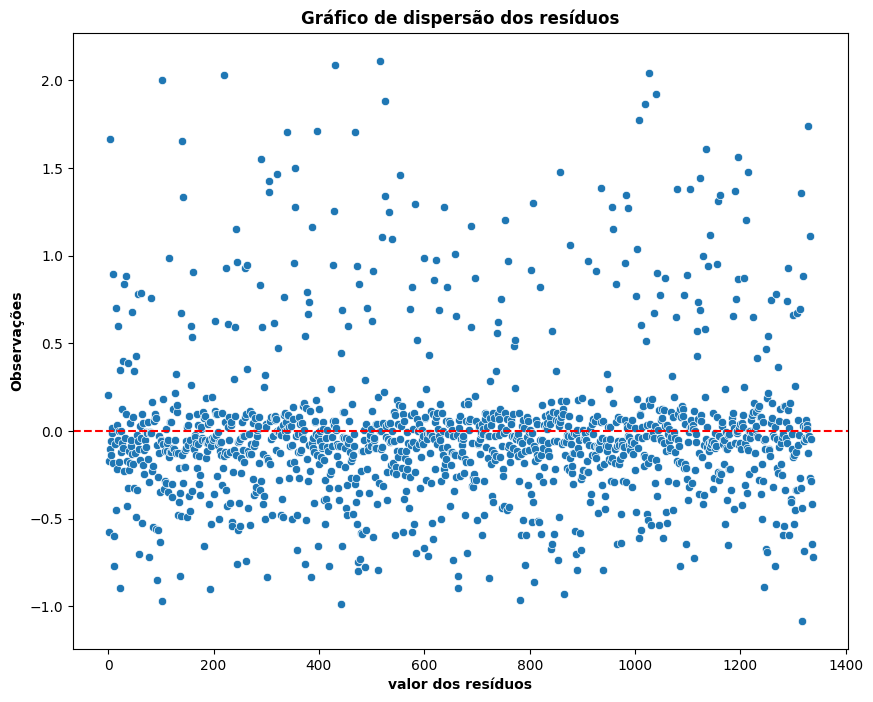

In [12]:
# Gráfico de dispersão
residuals = robust_model.resid

plt.figure(figsize=(10,8))
sns.scatterplot(x=range(len(residuals)),y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de dispersão dos resíduos',fontweight='bold')
plt.xlabel('valor dos resíduos',fontweight='bold')
plt.ylabel('Observações',fontweight='bold')
plt.grid(False)

O gráfico de dispersão dos resíduos evidência problema com heterocedasticidade, mostrando ter um um grupo próximo de zero e outros grupos que estão distante de zero tanto negativamente quanto positivamente. Isso ocorre, pois existe muitas variáveis que podem afetar esse modelo como exemplo localização, prática de exercícios físicos e também doenças preexistente.

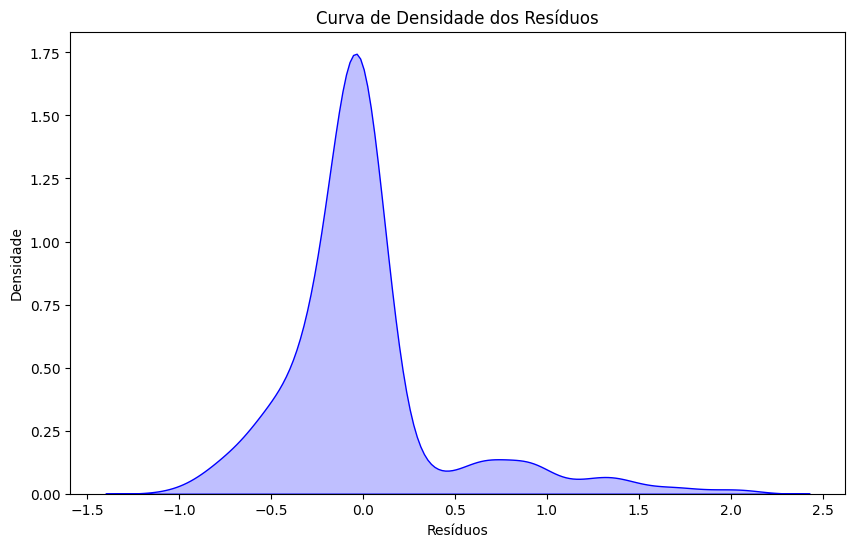

In [13]:
# Curva de densidade
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals, color="blue", fill=True)
plt.title('Curva de Densidade dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Densidade')
plt.show()

A curva de densidade dos resíduos do modelo indica que não segue uma distribuição normal, tendo uma cauda para direita podendo ser explicada por presença de outliers.

In [14]:
# Teste de homocedasticidade
from statsmodels.stats.diagnostic import het_breuschpagan

X = robust_model.model.exog 
bp_test = het_breuschpagan(residuals, X)

bp_value, bp_pvalue, f_value, f_pvalue = bp_test

print("Valor de Breusch-Pagan:", bp_value)
print("P-valor de Breusch-Pagan:", bp_pvalue)
print("Valor F:", f_value)
print("P-valor F:", f_pvalue)

Valor de Breusch-Pagan: 79.14696094708579
P-valor de Breusch-Pagan: 1.2655553251458604e-15
Valor F: 16.74917543366822
P-valor F: 4.464813976774446e-16


O teste de hipótese de Het Breuschpagan indica que os resíduos possuem heterocedasticidade rejeitando a hipótese nula de homocedasticidade.